# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

## Trends:
- Humidity % higher by latitude.
- The clouidness measurements had clusters at both high and low ranges which were connsistent for both northern and southern hemispheres.
- The strongest linear relationship was for the northern hemisphere max temp vrs latitude with the other measurements as below:  
    Linear Regression Strength by Factors Measured:
    Strong: 
    Northern Hemisphere - Max Temp vs. Latitude Linear Regression

    Medium:
    Southern Hemisphere - Max Temp vs. Latitude Linear Regression
    Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression
    Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

    Weak:
    Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression
    Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression
    Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression
    Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

In [4]:
pip install citipy

Note: you may need to restart the kernel to use updated packages.


In [6]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json
from scipy import stats

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)
#print(weather_api_key)

## Generate Cities List

In [7]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)
cities

['mar del plata',
 'baoqing',
 'hobart',
 'illoqqortoormiut',
 'namtsy',
 'bredasdorp',
 'rikitea',
 'torbay',
 'singaparna',
 'avera',
 'tuktoyaktuk',
 'hilo',
 'calinesti',
 'lebu',
 'riverton',
 'port elizabeth',
 'lavrentiya',
 'luderitz',
 'magdagachi',
 'battipaglia',
 'kupang',
 'faanui',
 'ushuaia',
 'kodiak',
 'deputatskiy',
 'akyab',
 'umzimvubu',
 'kommunar',
 'champasak',
 'hithadhoo',
 'jefferson city',
 'atuona',
 'sentyabrskiy',
 'yefira',
 'bambous virieux',
 'chokurdakh',
 'taolanaro',
 'polunochnoye',
 'bethel',
 'constitucion',
 'tiksi',
 'bolshoye bunkovo',
 'punta arenas',
 'busselton',
 'east london',
 'guarare',
 'zhezkazgan',
 'saint-philippe',
 'harlingen',
 'klaksvik',
 'hami',
 'vaini',
 'coquimbo',
 'tumannyy',
 'lata',
 'hays',
 'matara',
 'tasiilaq',
 'ahuimanu',
 'thinadhoo',
 'fortuna',
 'bemidji',
 'lieto',
 'qaanaaq',
 'rawson',
 'caernarfon',
 'saldanha',
 'ulu-telyak',
 'mehamn',
 'katsuura',
 'barrow',
 'nuuk',
 'illapel',
 'mataura',
 'cape town',


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [8]:
# set up lists to hold reponse info
dfcity = []
lat = []
lng = []
max_temp = []
humidity = []
cloudiness = []
windspeed = []
country = []
date = []

url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
api_key = weather_api_key

# Build partial query URL
query_url = f"{url}appid={api_key}&units={units}&q="

for city in cities:
    try:
#         print(query_url + city)
#         break
        response = requests.get(query_url + city).json()
        dfcity.append(response['name'])
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        max_temp.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        cloudiness.append(response['clouds']['all'])
        windspeed.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        print(f"Processing Record for {city}.")
    
    except (KeyError, IndexError):
        print("City not found. Skipping.")

# create a data frame
weather_dict = {
    "City": dfcity,
    "Lat": lat,
    "Lng": lng,
    "Max Temp": max_temp,
    "Humidity": humidity,
    "Cloudiness": cloudiness,
    "Windspeed": windspeed,
    "Country": country,
    "Date": date
}

weather_data = pd.DataFrame(weather_dict)
weather_data.head()

Processing Record for mar del plata.
Processing Record for baoqing.
Processing Record for hobart.
City not found. Skipping.
Processing Record for namtsy.
Processing Record for bredasdorp.
Processing Record for rikitea.
Processing Record for torbay.
Processing Record for singaparna.
Processing Record for avera.
Processing Record for tuktoyaktuk.
Processing Record for hilo.
Processing Record for calinesti.
Processing Record for lebu.
Processing Record for riverton.
Processing Record for port elizabeth.
Processing Record for lavrentiya.
Processing Record for luderitz.
Processing Record for magdagachi.
Processing Record for battipaglia.
Processing Record for kupang.
Processing Record for faanui.
Processing Record for ushuaia.
Processing Record for kodiak.
Processing Record for deputatskiy.
Processing Record for akyab.
City not found. Skipping.
Processing Record for kommunar.
Processing Record for champasak.
Processing Record for hithadhoo.
Processing Record for jefferson city.
Processing R

Processing Record for okhotsk.
Processing Record for tucuman.
Processing Record for kalmunai.
Processing Record for kyra.
Processing Record for brunswick.
Processing Record for birin.
Processing Record for rio tercero.
Processing Record for sabzevar.
Processing Record for mildura.
Processing Record for wittenberge.
City not found. Skipping.
Processing Record for plettenberg bay.
Processing Record for san quintin.
Processing Record for manama.
Processing Record for uray.
Processing Record for ouro preto do oeste.
Processing Record for port hardy.
Processing Record for vana-vigala.
City not found. Skipping.
Processing Record for banda aceh.
Processing Record for coihaique.
City not found. Skipping.
Processing Record for dakar.
Processing Record for avarua.
Processing Record for taloqan.
Processing Record for hastings.
Processing Record for huarmey.
Processing Record for sola.
Processing Record for kampong thum.
Processing Record for kulhudhuffushi.
Processing Record for lazarev.
City not

Processing Record for charcas.
Processing Record for gat.
City not found. Skipping.
Processing Record for yarmouth.
Processing Record for bathsheba.
Processing Record for iberia.
Processing Record for tuatapere.
Processing Record for marovoay.
Processing Record for chibuto.
Processing Record for miramar.
Processing Record for pitimbu.
Processing Record for kendari.
Processing Record for murashi.
Processing Record for ahipara.
Processing Record for urucara.
Processing Record for balad.
Processing Record for forestville.
Processing Record for daan.
Processing Record for mingguang.
Processing Record for cherskiy.
Processing Record for guerrero negro.
Processing Record for dzilam gonzalez.
City not found. Skipping.
Processing Record for auki.
Processing Record for clyde river.
Processing Record for cervo.
Processing Record for shingu.
Processing Record for winnemucca.
Processing Record for ursulo galvan.
Processing Record for agadir.
Processing Record for bayangol.
Processing Record for da

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Windspeed,Country,Date
0,Mar del Plata,-38.0023,-57.5575,62.62,55,0,15.01,AR,1628099781
1,Baoqing,46.3317,132.2111,70.75,86,81,5.73,CN,1628099830
2,Hobart,-42.8794,147.3294,48.06,72,95,1.01,AU,1628099736
3,Namtsy,62.7161,129.6658,55.51,60,49,3.42,RU,1628099831
4,Bredasdorp,-34.5322,20.0403,58.32,88,47,3.44,ZA,1628099832


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [10]:
weather_data.to_csv(output_data_file, index=False, header=True)

In [11]:
weather_data.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Windspeed,Date
count,572.000000,572.000000,572.000000,572.000000,572.000000,572.000000,5.720000e+02
mean,20.224853,16.364886,70.603217,67.068182,53.548951,7.589668,1.628100e+09
std,34.075644,91.815286,14.367751,22.332715,37.507212,5.367786,9.010342e+01
min,-54.800000,-179.166700,31.840000,10.000000,0.000000,0.000000,1.628100e+09
25%,-9.083750,-66.056675,60.190000,52.750000,14.000000,3.620000,1.628100e+09
50%,26.302200,22.340550,72.175000,72.000000,58.500000,6.095000,1.628100e+09
75%,49.807925,98.546000,80.760000,86.000000,91.000000,10.655000,1.628100e+09
max,78.218600,178.416700,105.710000,100.000000,100.000000,34.520000,1.628100e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [12]:
humidity_df = weather_data.loc[weather_data["Humidity"] > 100, :]
humidity_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Windspeed,Country,Date


In [ ]:
#  Get the indices of cities that have humidity over 100%.


In [ ]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
# indexNames = weather_data[weather_data['City'] == '' ].index
# # Delete these row indexes from dataFrame
# clean_city_data = weather_data.drop(indexNames , inplace=False)
# print(clean_city_data)



In [ ]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

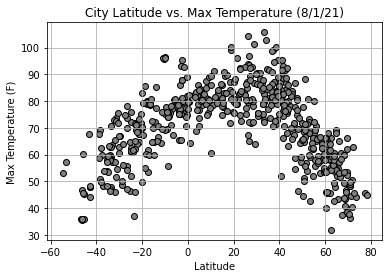

In [13]:
plt.scatter(weather_data["Lat"], weather_data["Max Temp"], marker="o", color = "grey" , edgecolors= "black")
plt.title("City Latitude vs. Max Temperature (8/1/21)")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)
plt.show()

## Latitude vs. Humidity Plot

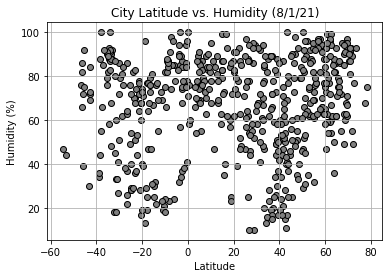

In [14]:
plt.scatter(weather_data["Lat"], weather_data["Humidity"], marker="o", color = "grey" , edgecolors= "black")
plt.title("City Latitude vs. Humidity (8/1/21)")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
plt.show()

## Latitude vs. Cloudiness Plot

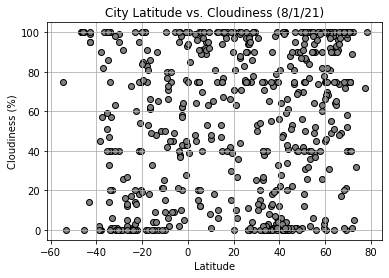

In [15]:
plt.scatter(weather_data["Lat"], weather_data["Cloudiness"], marker="o", color = "grey" , edgecolors= "black")
plt.title("City Latitude vs. Cloudiness (8/1/21)")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
plt.show()

## Latitude vs. Wind Speed Plot

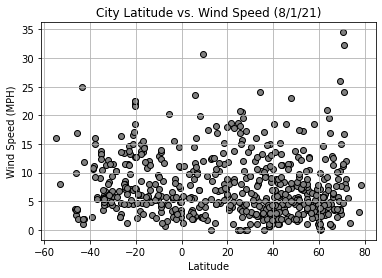

In [16]:
plt.scatter(weather_data["Lat"], weather_data["Windspeed"], marker="o", color = "grey" , edgecolors= "black")
plt.title("City Latitude vs. Wind Speed (8/1/21)")
plt.ylabel("Wind Speed (MPH)")
plt.xlabel("Latitude")
plt.grid(True)
plt.show()

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

y = -0.53x +93.89
The r-value is: 0.505878063751261


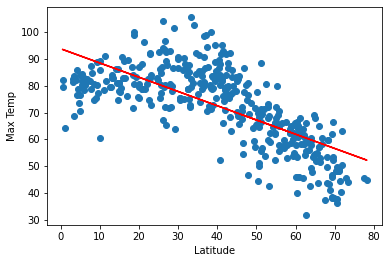

In [17]:
north_df = weather_data.loc[weather_data["Lat"] >= 0, :]
north_df
    
#Values:
x_values = north_df['Lat']
y_values = north_df['Max Temp']

# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept
#print(regress_values)

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

# Create Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.annotate(line_eq,(20,15),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

y = 0.7x +82.09
The r-value is: 0.5250535089775142


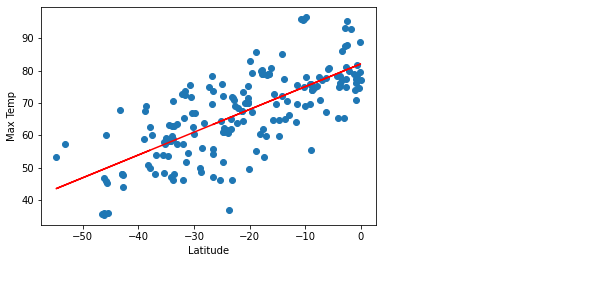

In [18]:
south_df = weather_data.loc[weather_data["Lat"] < 0, :]
south_df
    
#Values:
x_values = south_df['Lat']
y_values = south_df['Max Temp']

# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept
#print(regress_values)

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

# Create Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.annotate(line_eq,(20,15),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

y = 0.08x +65.17
The r-value is: 0.005105946520556864


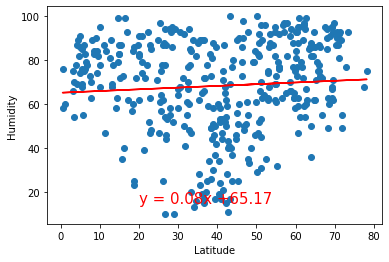

In [19]:
 
#Values:
x_values = north_df['Lat']
y_values = north_df['Humidity']

# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept
#print(regress_values)

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

# Create Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.annotate(line_eq,(20,15),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

y = 0.07x +65.9
The r-value is: 0.0013204612674380942


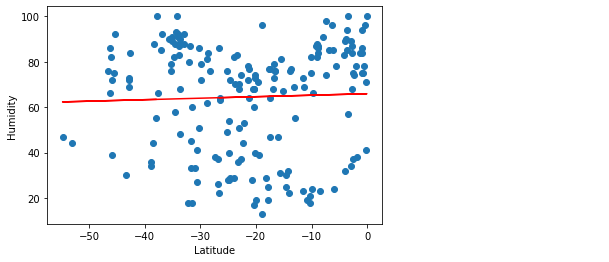

In [20]:

#Values:
x_values = south_df['Lat']
y_values = south_df['Humidity']

# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept
#print(regress_values)

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

# Create Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.annotate(line_eq,(20,15),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

y = 0.11x +53.05
The r-value is: 0.0033437508745126554


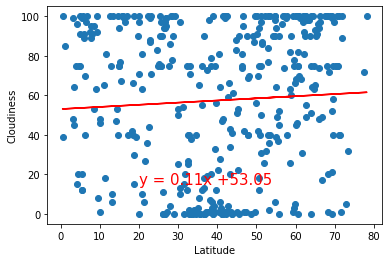

In [21]:
#Values:
x_values = north_df['Lat']
y_values = north_df['Cloudiness']

# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept
#print(regress_values)

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

# Create Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.annotate(line_eq,(20,15),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

y = 0.02x +46.06
The r-value is: 7.193049265557745e-05


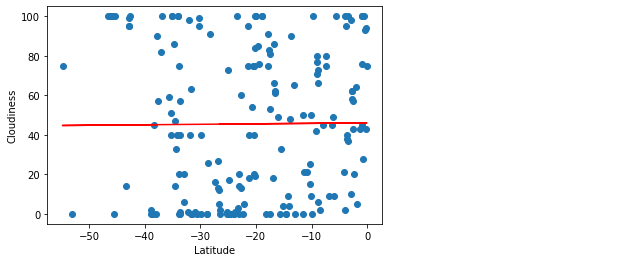

In [22]:
#Values:
x_values = south_df['Lat']
y_values = south_df['Cloudiness']

# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept
#print(regress_values)

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

# Create Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.annotate(line_eq,(20,15),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

y = -0.02x +7.97
The r-value is: 0.0028990611481395016


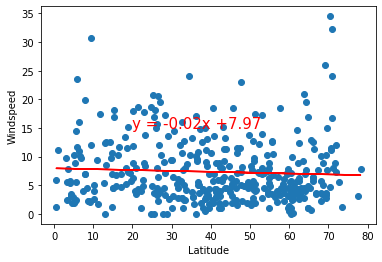

In [23]:

#Values:
x_values = north_df['Lat']
y_values = north_df['Windspeed']

# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept
#print(regress_values)

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

# Create Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Windspeed')
plt.annotate(line_eq,(20,15),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

y = -0.04x +7.18
The r-value is: 0.012867289987996784


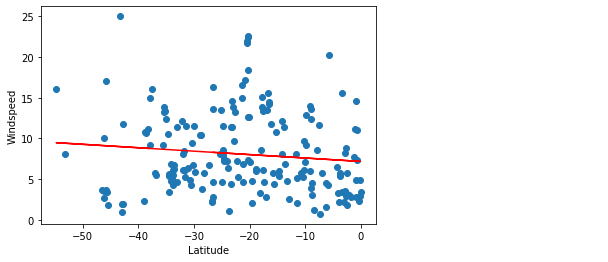

In [24]:
#Values:
x_values = south_df['Lat']
y_values = south_df['Windspeed']

# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept
#print(regress_values)

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

# Create Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Windspeed')
plt.annotate(line_eq,(20,15),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()